<a href="https://colab.research.google.com/github/bmaged23/EDA/blob/main/EDA_ML_form_scratch_insurance_dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#train_test_split 80 20

In [4]:
!kaggle datasets download -d mirichoi0218/insurance


Dataset URL: https://www.kaggle.com/datasets/mirichoi0218/insurance
License(s): DbCL-1.0
  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 15.5MB/s]


In [5]:
import zipfile
import os
import numpy as np
import seaborn as sns
# Define the path to the zip file
zip_file_path = '/content/insurance.zip'

# Define the directory where you want to extract the contents
extract_dir = '/content/insurance'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)


In [6]:
import pandas as pd
url="/content/insurance/insurance.csv"
df=pd.read_csv(url)
new_df=df
new_df=new_df.drop_duplicates()
new_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [8]:
new_df["sex"]=new_df["sex"].astype("category")
new_df["smoker"]=new_df["smoker"].astype("category")
new_df["region"]=new_df["region"].astype("category")

<ipython-input-8-1b4e0b146eda>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["sex"]=new_df["sex"].astype("category")
<ipython-input-8-1b4e0b146eda>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["smoker"]=new_df["smoker"].astype("category")
<ipython-input-8-1b4e0b146eda>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [9]:
new_df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
new_df=new_df[new_df["bmi"]<47]

In [11]:
new_df=new_df.drop_duplicates()
print(new_df.duplicated().count())

1328


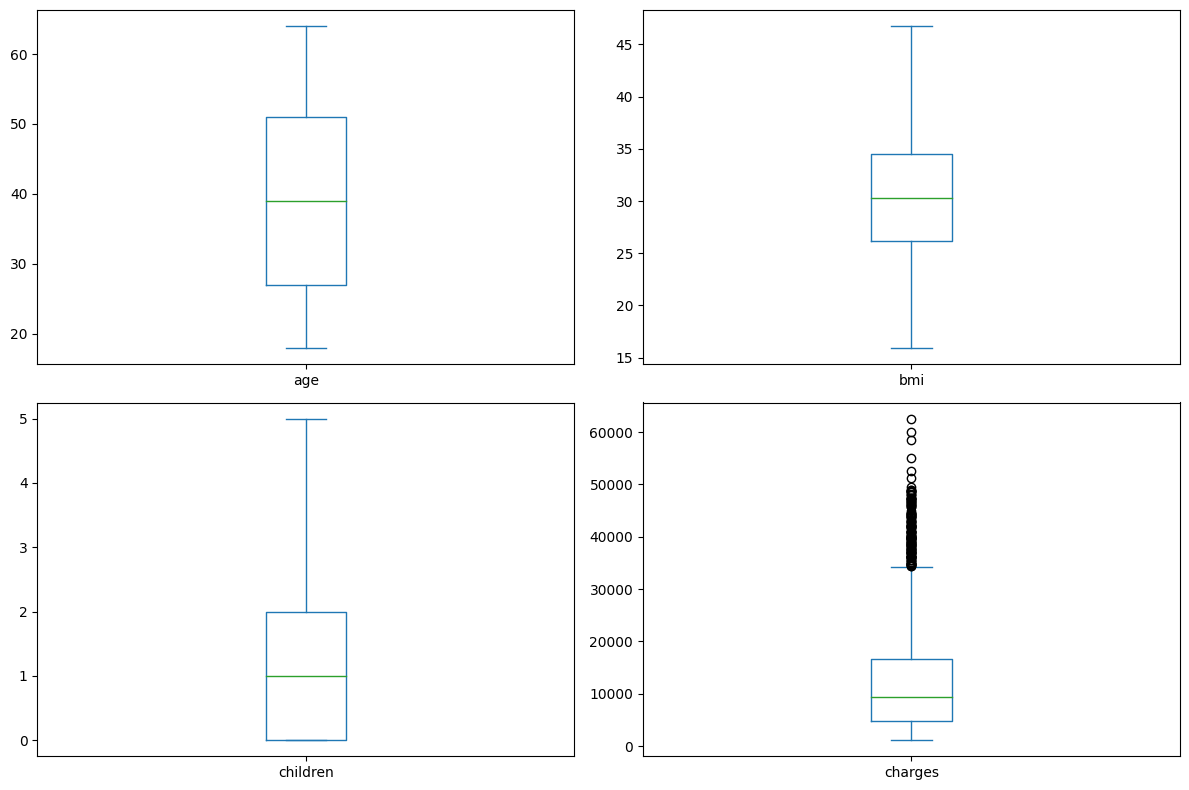

In [12]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
new_df.plot(kind='box', subplots=True, layout=(2, -1), figsize=(12, 8))
plt.tight_layout()
plt.show()


smoker
no     1057
yes     271
Name: count, dtype: int64


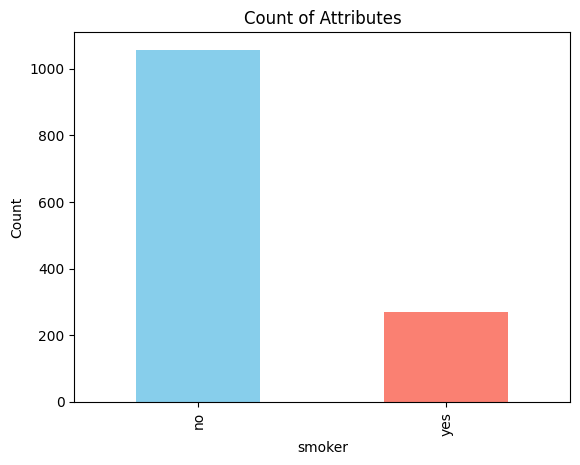

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

bar_df = new_df['smoker'].value_counts()
print(bar_df)
bar_df.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Count of Attributes')
plt.xlabel('smoker')
plt.ylabel('Count')
plt.show()

In [14]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['sex'], df['smoker'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)


Chi-Square Statistic: 7.39291081459996
p-value: 0.006548143503580696
Degrees of Freedom: 1
Expected Frequencies:
[[526.43348281 135.56651719]
 [537.56651719 138.43348281]]


In [15]:
#print(new_df[new_df["charges"]>30000])
#new_df=new_df[new_df["charges"]<30000]
new_df=new_df.drop(columns=["region","sex"])
new_df

,age,bmi,children,smoker,charges
0,19,27.900,0,yes,16884.92400
1,18,33.770,1,no,1725.55230
2,28,33.000,3,no,4449.46200
3,33,22.705,0,no,21984.47061
4,32,28.880,0,no,3866.85520
...,...,...,...,...,...
1333,50,30.970,3,no,10600.54830
1334,18,31.920,0,no,2205.98080
1335,18,36.850,0,no,1629.83350
1336,21,25.800,0,no,2007.94500


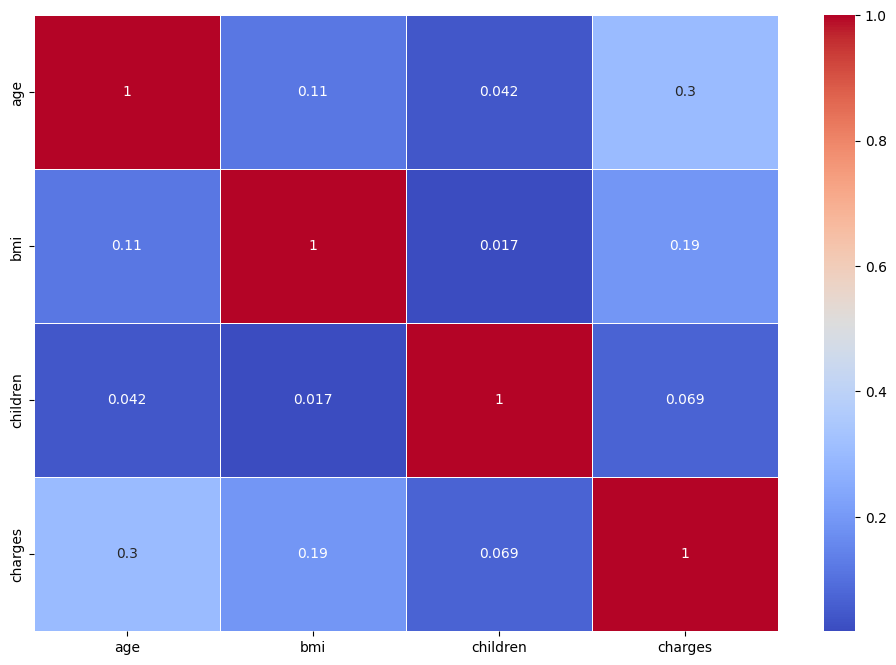

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#new_df2 = new_df.drop(columns=['emp.var.rate','euribor3m'])
num_df=new_df[["age","bmi","children","charges"]]
correlation_matrix = num_df.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.show()


In [17]:
'''from sklearn.preprocessing import OneHotEncoder
import pandas as pd
ohe = OneHotEncoder(sparse=False)

cat_cols = new_df.select_dtypes(include=['category']).columns

encoded_df = pd.DataFrame(ohe.fit_transform(new_df[cat_cols]),
                          columns=ohe.get_feature_names_out(cat_cols))

new_df.drop(cat_cols, axis=1, inplace=True)

new_df = pd.concat([new_df, encoded_df], axis=1)'''
col=list(new_df.columns)
new_df = pd.get_dummies(new_df, columns=['smoker'])
print(new_df.info())
new_df=new_df.dropna()
print(new_df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 1328 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1328 non-null   int64  
 1   bmi         1328 non-null   float64
 2   children    1328 non-null   int64  
 3   charges     1328 non-null   float64
 4   smoker_no   1328 non-null   bool   
 5   smoker_yes  1328 non-null   bool   
dtypes: bool(2), float64(2), int64(2)
memory usage: 54.5 KB
None
age           0
bmi           0
children      0
charges       0
smoker_no     0
smoker_yes    0
dtype: int64


In [18]:
print(new_df.info)
colu=list(new_df.columns)
for col in colu:
  print(col)
  print(new_df[col].unique())
  print("_________")

<bound method DataFrame.info of       age     bmi  children      charges  smoker_no  smoker_yes
0      19  27.900         0  16884.92400      False        True
1      18  33.770         1   1725.55230       True       False
2      28  33.000         3   4449.46200       True       False
3      33  22.705         0  21984.47061       True       False
4      32  28.880         0   3866.85520       True       False
...   ...     ...       ...          ...        ...         ...
1333   50  30.970         3  10600.54830       True       False
1334   18  31.920         0   2205.98080       True       False
1335   18  36.850         0   1629.83350       True       False
1336   21  25.800         0   2007.94500       True       False
1337   61  29.070         0  29141.36030      False        True

[1328 rows x 6 columns]>
age
[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
_________
bmi
[27.9   33.7

In [19]:
from sklearn.preprocessing import StandardScaler
col=list(new_df.columns)
num_cols=len(col)
scaler = StandardScaler()
new_df2_num_scaled = pd.DataFrame(scaler.fit_transform(new_df[col]), columns=col)
new_df2_num_scaled


,age,bmi,children,charges,smoker_no,smoker_yes
0,-1.440429,-0.445495,-0.908563,0.305500,-1.974935,1.974935
1,-1.511669,0.546068,-0.080442,-0.958515,0.506346,-0.506346
2,-0.799261,0.415999,1.575799,-0.731390,0.506346,-0.506346
3,-0.443056,-1.323037,-0.908563,0.730710,0.506346,-0.506346
4,-0.514297,-0.279953,-0.908563,-0.779969,0.506346,-0.506346
...,...,...,...,...,...,...
1323,0.768039,0.073091,1.575799,-0.218502,0.506346,-0.506346
1324,-1.511669,0.233565,-0.908563,-0.918456,0.506346,-0.506346
1325,-1.511669,1.066343,-0.908563,-0.966496,0.506346,-0.506346
1326,-1.297947,-0.800228,-0.908563,-0.934968,0.506346,-0.506346


In [20]:
new_df2_num_scaled

,age,bmi,children,charges,smoker_no,smoker_yes
0,-1.440429,-0.445495,-0.908563,0.305500,-1.974935,1.974935
1,-1.511669,0.546068,-0.080442,-0.958515,0.506346,-0.506346
2,-0.799261,0.415999,1.575799,-0.731390,0.506346,-0.506346
3,-0.443056,-1.323037,-0.908563,0.730710,0.506346,-0.506346
4,-0.514297,-0.279953,-0.908563,-0.779969,0.506346,-0.506346
...,...,...,...,...,...,...
1323,0.768039,0.073091,1.575799,-0.218502,0.506346,-0.506346
1324,-1.511669,0.233565,-0.908563,-0.918456,0.506346,-0.506346
1325,-1.511669,1.066343,-0.908563,-0.966496,0.506346,-0.506346
1326,-1.297947,-0.800228,-0.908563,-0.934968,0.506346,-0.506346


In [21]:
col=list(new_df2_num_scaled.columns)
Y=new_df2_num_scaled[[col[3]]]
X=new_df2_num_scaled[col[0:3]+col[4:8]]
print(Y.head())
print(X.head())

    charges
0  0.305500
1 -0.958515
2 -0.731390
3  0.730710
4 -0.779969
        age       bmi  children  smoker_no  smoker_yes
0 -1.440429 -0.445495 -0.908563  -1.974935    1.974935
1 -1.511669  0.546068 -0.080442   0.506346   -0.506346
2 -0.799261  0.415999  1.575799   0.506346   -0.506346
3 -0.443056 -1.323037 -0.908563   0.506346   -0.506346
4 -0.514297 -0.279953 -0.908563   0.506346   -0.506346


In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=20)
print(y_train)
print(x_train)

       charges
640  -0.256808
62    1.412952
143   0.627443
540  -0.249274
630   0.099215
...        ...
1242 -0.998870
924  -0.582234
1247 -0.148779
271  -0.496567
474  -0.891072

[1062 rows x 1 columns]
           age       bmi  children  smoker_no  smoker_yes
640   0.625557  0.040996  1.575799   0.506346   -0.506346
62    1.765412 -0.986041 -0.080442   0.506346   -0.506346
143  -0.656779 -0.312048  1.575799  -1.974935    1.974935
540   1.053003 -0.055289 -0.908563   0.506346   -0.506346
630   1.765412  1.292696 -0.908563   0.506346   -0.506346
...        ...       ...       ...        ...         ...
1242 -1.440429 -1.813751 -0.908563   0.506346   -0.506346
924  -0.015611  0.331539 -0.080442   0.506346   -0.506346
1247  0.839280  0.987795  1.575799   0.506346   -0.506346
271   0.126871  1.100127  0.747678   0.506346   -0.506346
474  -1.012983  0.859415 -0.908563   0.506346   -0.506346

[1062 rows x 5 columns]


In [23]:
def h(theta1,X,theta0):
  return np.dot(X,theta1)+theta0
np.random.seed(20)

'''print(theta1)
print("_________")
print(theta0)'''
x=np.array(x_train)
y=np.array(y_train)
'''H=h(theta1,x,theta0)
print(H)
print(y)
print(H.shape)
print(y.shape)'''


'H=h(theta1,x,theta0)\nprint(H)\nprint(y)\nprint(H.shape)\nprint(y.shape)'

In [24]:
def cost(h_theta,Y):
  m=len(Y)
  return (1/(2*m))*np.sum(np.power((h_theta - Y),2))

'''costs=cost(H,y)
print(H.shape)
print(Y.shape)
print(costs)'''


'costs=cost(H,y)\nprint(H.shape)\nprint(Y.shape)\nprint(costs)'

In [25]:
learning_rate=0.01
def gradient(h,y,x):
  m=len(y)
  der1=(1/m)*np.dot(x.T,(h-y))
  der0=(1/m)*np.sum(h-y)
  return der1,der0

'''print(H.shape)
print(y.shape)
print(x.shape)
der_theta1,der_theta0=gradient(H,y,x)
print(der_theta1,der_theta0)'''
def update(theta1,theta0,learning_rate,der_theta1,der_theta0):
  theta1=theta1-(learning_rate*der_theta1)
  theta0=theta0-(learning_rate*der_theta0)
  return theta1, theta0
'''theta1,theta0=update(theta1,theta0,learning_rate,der_theta1,der_theta0)
print(theta1,theta0)'''


'theta1,theta0=update(theta1,theta0,learning_rate,der_theta1,der_theta0)\nprint(theta1,theta0)'

In [26]:
learning_rate=0.01
cost_list=[]
np.random.seed(20)
theta1=np.random.randn(5,1)
theta0=np.random.randn(1)
H=0
for i in range(1000):
  H=h(theta1,x,theta0)
  costs=cost(H,y)
  cost_list.append(costs)
  der_theta1,der_theta0=gradient(H,y,x)
  theta1,theta0=update(theta1,theta0,learning_rate,der_theta1,der_theta0)
print(cost_list[990:])


[0.11948585944118222, 0.11948585938858111, 0.11948585933692019, 0.11948585928618263, 0.1194858592363519, 0.1194858591874117, 0.11948585913934608, 0.11948585909213935, 0.11948585904577616, 0.11948585900024136]


In [27]:
print(cost(H,y))

0.11948585900024136


In [28]:
def R2(h,y):
  avg_y=np.mean(y)
  sse=np.sum(np.power((h-y),2))
  sst=np.sum(np.power((y-avg_y),2))
  return 1-(sse/sst)
print(R2(H,y))


0.7599501650596661


In [29]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)
p=model.predict(x)
print(R2(p,y))

0.7599501701027869


In [30]:
import numpy as np
from sklearn.cross_decomposition import PLSRegression

def calculate_vip(pls_model, X):
    T = pls_model.x_scores_
    W = pls_model.x_weights_
    Q = pls_model.y_loadings_

    p, A = W.shape
    s = np.diag(T.T @ T @ Q.T @ Q).reshape(A, -1)
    total_s = np.sum(s)

    vip = np.zeros((p,))

    for j in range(p):
        weight = np.array([W[j, a]**2 for a in range(A)])
        vip[j] = np.sqrt(p * (s.T @ weight) / total_s)

    return vip

# Sample data
np.random.seed(0)
X = x_train
y = y_train

# Fit PLS model
pls = PLSRegression(n_components=2)
pls.fit(X, y)

# Calculate VIP scores
vip_scores = calculate_vip(pls, X)
print("VIP Scores:", vip_scores)


VIP Scores: [0.65882946 0.40960908 0.15949002 1.4786357  1.4786357 ]


<ipython-input-30-d195f750728e>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  vip[j] = np.sqrt(p * (s.T @ weight) / total_s)
